In [7]:
import json
import numpy as np
import pandas as pd
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_error

# 读取数据
with open('data.json', 'r') as f:
    data = json.load(f)

# 训练每个国家的模型
country_models = {}
test_error = []
for country, entries in data.items():
    if len(entries) < 4:  # 至少需要4个样本
        continue

    # 提取特征和标签
    X = np.array([e['Feats'] for e in entries])
    y = np.array([e['label'][3] for e in entries])

    # 时间序列训练集划分（最后20%作为测试集）
    split_idx = int(len(X) * 0.8)
    X_train, X_test = X[:split_idx], X[split_idx:]
    y_train, y_test = y[:split_idx], y[split_idx:]

    # 训练Lasso模型（自动选择alpha）
    try:
        model = LassoCV(alphas=np.logspace(-6, 2, 100), cv=3, max_iter=10000)
        model.fit(X_train, y_train)

        # 评估模型
        train_mae = mean_absolute_error(y_train, model.predict(X_train))
        test_mae = mean_absolute_error(y_test, model.predict(X_test)) if len(X_test) > 0 else np.nan
        print(f"{country} - 训练MAE: {train_mae:.1f}, 测试MAE: {test_mae:.1f}")
        if len(X_test) > 0:
            test_error.extend(model.predict(X_test) - y_test)  # 添加预测误差
    except Exception as e:
        print(f"{country}训练失败: {str(e)}")

# 预测函数
def predict_medals(country_code, features):
    if country_code not in country_models:
        raise ValueError(f"无模型可用于国家: {country_code}")
    return max(0, country_models[country_code].predict([features])[0])  # 确保非负数

# # 示例预测
# features_usa = [10, 8, 6, 24, 500, 1] * 3 + [1]  # 前三届特征 + 主办方
# print(f"美国预测: {predict_medals('USA', features_usa):.1f} 枚奖牌")

ARG - 训练MAE: 2.1, 测试MAE: 0.5
AUS - 训练MAE: 8.8, 测试MAE: 10.9
AUT - 训练MAE: 0.8, 测试MAE: 2.0
AZE - 训练MAE: 4.4, 测试MAE: 4.3
BEL - 训练MAE: 1.5, 测试MAE: 3.2
BGR - 训练MAE: 2.4, 测试MAE: 5.4


C:\anaconda\envs\CSCI3230\ICM2025\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


BHS - 训练MAE: 0.4, 测试MAE: 0.3
BRA - 训练MAE: 1.2, 测试MAE: 4.6
CAN - 训练MAE: 4.5, 测试MAE: 14.8
CHE - 训练MAE: 2.7, 测试MAE: 5.0
CHN - 训练MAE: 10.7, 测试MAE: 27.9
CUB - 训练MAE: 5.4, 测试MAE: 4.0


C:\anaconda\envs\CSCI3230\ICM2025\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


CZE - 训练MAE: 0.4, 测试MAE: 5.7
DEU - 训练MAE: 3.7, 测试MAE: 5.4
DNK - 训练MAE: 2.3, 测试MAE: 4.6
ESP - 训练MAE: 3.7, 测试MAE: 1.1


C:\anaconda\envs\CSCI3230\ICM2025\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


ETH - 训练MAE: 0.9, 测试MAE: 4.1
FIN - 训练MAE: 4.4, 测试MAE: 5.3
FRA - 训练MAE: 5.3, 测试MAE: 7.5
GBR - 训练MAE: 8.9, 测试MAE: 41.9
GEO - 训练MAE: 0.0, 测试MAE: 2.3
GRC - 训练MAE: 3.3, 测试MAE: 3.4
HRV - 训练MAE: 0.0, 测试MAE: 2.2
HUN - 训练MAE: 6.0, 测试MAE: 2.2


C:\anaconda\envs\CSCI3230\ICM2025\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


IDN - 训练MAE: 0.6, 测试MAE: 1.2
IND - 训练MAE: 1.8, 测试MAE: 4.0
IRN - 训练MAE: 2.8, 测试MAE: 4.8
ITA - 训练MAE: 5.3, 测试MAE: 7.4
JAM - 训练MAE: 1.0, 测试MAE: 2.5
JPN - 训练MAE: 4.8, 测试MAE: 17.0
KAZ - 训练MAE: 0.0, 测试MAE: 1.7
KEN - 训练MAE: 1.1, 测试MAE: 4.7
KOR - 训练MAE: 2.4, 测试MAE: 6.6
LTU - 训练MAE: 1.4, 测试MAE: 0.2
MAR - 训练MAE: 0.3, 测试MAE: 1.0
MEX - 训练MAE: 2.1, 测试MAE: 2.1
NLD - 训练MAE: 4.2, 测试MAE: 12.4
NOR - 训练MAE: 3.5, 测试MAE: 4.4
NZL - 训练MAE: 1.2, 测试MAE: 8.5
POL - 训练MAE: 4.7, 测试MAE: 7.1


C:\anaconda\envs\CSCI3230\ICM2025\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
C:\anaconda\envs\CSCI3230\ICM2025\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


PRK - 训练MAE: 0.4, 测试MAE: 0.3
PRT - 训练MAE: 1.3, 测试MAE: 2.0
ROU - 训练MAE: 7.1, 测试MAE: 16.9


C:\anaconda\envs\CSCI3230\ICM2025\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
C:\anaconda\envs\CSCI3230\ICM2025\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
C:\anaconda\envs\CSCI3230\ICM2025\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

SVK - 训练MAE: 0.0, 测试MAE: 3.0
SVN - 训练MAE: 0.2, 测试MAE: 1.5
SWE - 训练MAE: 2.0, 测试MAE: 6.9
THA - 训练MAE: 1.5, 测试MAE: 2.0
TUR - 训练MAE: 2.1, 测试MAE: 5.3
TWN - 训练MAE: 1.3, 测试MAE: 0.4


C:\anaconda\envs\CSCI3230\ICM2025\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


UKR - 训练MAE: 3.6, 测试MAE: 4.3
USA - 训练MAE: 14.7, 测试MAE: 10.3
UZB - 训练MAE: 4.0, 测试MAE: 6.0
YUG - 训练MAE: 3.1, 测试MAE: 4.0
ZAF - 训练MAE: 2.7, 测试MAE: 1.5


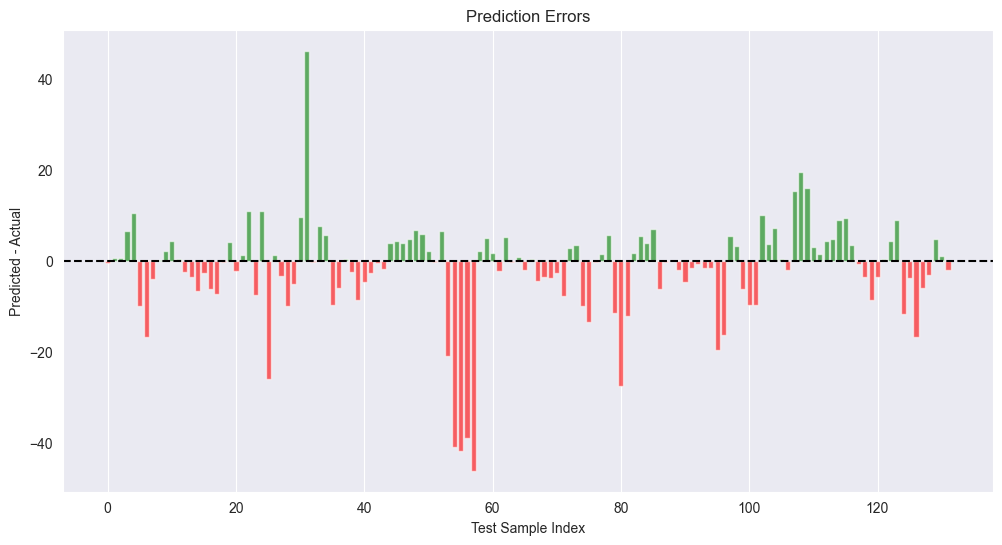

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# 假设 test_error 是一个包含预测值与真实值之间差异的列表
# test_error = [误差1, 误差2, 误差3, ..., 误差n]

# 创建颜色数组，根据误差决定颜色
colors = ['green' if error > 0 else 'red' for error in test_error]

# 绘制误差图
plt.figure(figsize=(12, 6))
plt.bar(range(len(test_error)), test_error, color=colors, alpha=0.6)
plt.axhline(0, color='black', linestyle='--')  # 添加零误差参考线
plt.title('Prediction Errors')
plt.xlabel('Test Sample Index')
plt.ylabel('Predicted - Actual')
# plt.xticks(range(len(test_error)))  # 根据误差数量设置x轴刻度
plt.grid(axis='y')  # 添加y轴网格
plt.show()